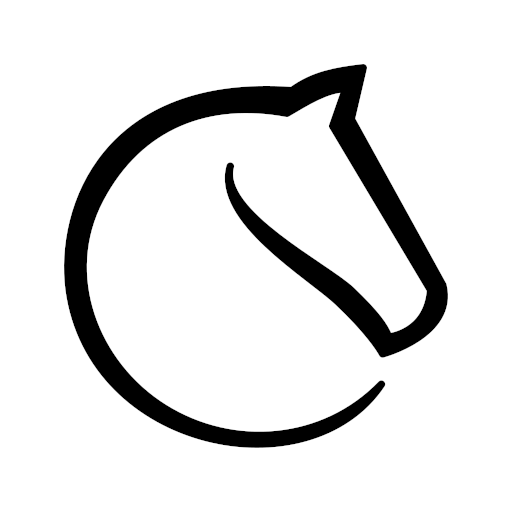

# Introduction

Theese data are representing from +20K chess games on lichess.org . Consist of 17 columns which are:
1. game_id : the unique number of the game
2. rated : rated game or unrated game (TRUE/FALSE)
3. turns : the number of turn untill the game is finished
4. victory_status : how does the game are won? Resign/Mate/Out of time?
5. winner : the winner of the game (Black/White)
6. time_increment : the time increment type of the game
7. white_id : white player id
8. white_rating : white player rating
9. black_id : black player id
10. black_rating : black player rating
11. moves : the move that had taken during the game
12. opening_code : the code for popular openings (source: https://lichess.org/editor)
13. opening_moves : the number of move that opening took
14. opening_fullname : the full name of opening moves (shortname + response + variation)
15. opening_shortname : the short name of opening moves
16. opening_response : the response from black 
17. opening_variation : the opening variaton

This exploratory data analysis goals are:
1. To know **which side has bigger opportunity** to win the game
2. To know **what is the best of opening move which has bigger opportunity** to win the game based on your side.
3. To know **which side has bigger oportunity** to win the game on a certain time increment and certain rating.


In [1]:
def pieplot(data, label, title):
    colors = sns.color_palette('deep')

    # The Pie Plot
    plt.figure(figsize=(10,10))
    plt.pie(data, colors = colors, autopct = '%1.1f%%', 
            textprops = {'color':'w','fontfamily' : 'serif', 'fontsize' : 12, 'weight' : 'bold'},
            shadow = True, startangle = -25)
    plt.legend(labels = label, loc = 2, fontsize = 'large', shadow = True)
    plt.title(title, fontsize = 20, fontfamily = 'Serif', fontweight = 'bold')
    plt.show()
    
def pieplotbw(data, label, title):
    colors = ['#2f3033','#627694', '#cdcfd1']

    # The Pie Plot
    plt.figure(figsize=(10,10))
    plt.pie(data, colors = colors, autopct = '%1.1f%%', 
            textprops = {'color':'w','fontfamily' : 'serif', 'fontsize' : 12, 'weight' : 'bold'},
            shadow = True, startangle = -25)
    plt.legend(labels = label, loc = 2, fontsize = 'large', shadow = True)
    plt.title(title, fontsize = 20, fontfamily = 'Serif', fontweight = 'bold')
    plt.show()

# Data Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data loading
raw = pd.read_csv('chess_games.csv')
df = raw.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

# Data Processing

Because of the ***'opening_response' and 'opening_variaton'*** is already mentioned in ***'opening_fullname'*** we will drop theese two tables

In [5]:
df = df.drop(['opening_response', 'opening_variation'], axis = 1)
df

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,20054,True,24,Resign,White,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,2,Dutch Defense,Dutch Defense
20054,20055,True,82,Mate,Black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,2,Queen's Pawn,Queen's Pawn
20055,20056,True,35,Mate,White,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game
20056,20057,True,109,Resign,White,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,4,Pirc Defense,Pirc Defense


In [6]:
# Checking the unique values of winner, victory_status, time_increment column

for x in ['winner', 'victory_status', 'time_increment']:
    print('\nThe unique value of', x, 'are:')
    print('\n', df[x].unique())



The unique value of winner are:

 ['White' 'Black' 'Draw']

The unique value of victory_status are:

 ['Out of Time' 'Resign' 'Mate' 'Draw']

The unique value of time_increment are:

 ['15+2' '5+10' '20+0' '30+3' '10+0' '15+30' '15+0' '20+60' '5+40' '8+0'
 '15+15' '15+16' '11+0' '30+60' '15+5' '10+10' '15+3' '18+0' '30+30'
 '20+25' '5+5' '30+0' '40+40' '16+0' '6+10' '8+10' '8+12' '7+12' '15+10'
 '20+5' '20+10' '45+0' '5+8' '30+2' '25+0' '10+2' '7+2' '25+25' '7+8'
 '6+6' '10+4' '12+0' '15+1' '2+10' '9+0' '10+9' '6+7' '30+10' '30+15'
 '10+3' '45+30' '9+2' '7+3' '6+5' '25+5' '5+7' '8+2' '20+8' '30+5' '25+15'
 '15+7' '8+8' '5+9' '16+7' '10+7' '7+5' '40+20' '10+5' '11+5' '10+15'
 '180+0' '17+5' '8+5' '3+8' '60+120' '90+120' '15+8' '9+1' '9+3' '2+15'
 '10+1' '5+12' '60+10' '5+60' '8+15' '30+25' '12+1' '14+0' '60+20' '10+8'
 '20+3' '14+12' '7+7' '60+0' '45+45' '4+15' '5+6' '180+180' '8+3' '4+6'
 '10+25' '3+10' '7+4' '6+3' '5+15' '45+15' '15+20' '6+8' '6+9' '14+8'
 '6+4' '15+4' '9+20' '20+15'

Because of we are not going to explore the data based on ids, **we will drop all the id columns.** We are also not going to analyze the moves that had taken on the game, so **the 'moves' column will be also dropped.**


In [7]:
df = df.drop(['game_id', 'white_id', 'black_id', 'moves'], axis = 1)

In [8]:
df.head()

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,opening_code,opening_moves,opening_fullname,opening_shortname
0,False,13,Out of Time,White,15+2,1500,1191,D10,5,Slav Defense: Exchange Variation,Slav Defense
1,True,16,Resign,Black,5+10,1322,1261,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense
2,True,61,Mate,White,5+10,1496,1500,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game
3,True,61,Mate,White,20+0,1439,1454,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game
4,True,95,Mate,White,30+3,1523,1469,C41,5,Philidor Defense,Philidor Defense


In [9]:
# Check if the opening_code uniqueness
oc_un = df.opening_code.nunique()
os_un = df.opening_shortname.nunique()
of_un = df.opening_fullname.nunique()

print('The unique number of opening code is',oc_un)
print('The unique number of opening short name is',os_un)
print('The unique number of opening full name is', of_un)

The unique number of opening code is 365
The unique number of opening short name is 128
The unique number of opening full name is 1477


For exploratory data analysis purposes, **we only categorize the openings based on its short name** because this is the simplest way.

## Game Time Categorization

Based on lichess.org, the time incerement is devided into 5 different categories: **bullet, blitz, rapid, classical, and custom**.
1. Bullet (1+0 or 2+1)
2. Blitz (3+0, 3+2, 5+0, or 5+3)
3. Rapid (10+0, 10+5, or 15+10)
4. Classical (30+0 or 30+20)
5. Custom (other than thoose)

So, we will categorize the time_increment into theese categories.

In [10]:
#Categorize the time_increment
category = []

bullet_like = ['1', '2']
blitz_like = ['3', '5']
rapid_like = ['10', '15']
classic_like = ['30']

for time in df['time_increment']:
    if time == '1+0' or time == '2+1':
        category.append('Bullet')
    elif time == '3+0' or time == '3+2' or time == '5+0' or time == '5+3':
        category.append('Blitz')
    elif time == '10+0' or time == '10+5' or time == '15+10':
        category.append('Rapid')
    elif time == '30+0' or time == '30+20':
        category.append('Classical')
    else:
        category.append('Custom')

In [11]:
df['time_category'] = category
df

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,opening_code,opening_moves,opening_fullname,opening_shortname,time_category
0,False,13,Out of Time,White,15+2,1500,1191,D10,5,Slav Defense: Exchange Variation,Slav Defense,Custom
1,True,16,Resign,Black,5+10,1322,1261,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,Custom
2,True,61,Mate,White,5+10,1496,1500,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,Custom
3,True,61,Mate,White,20+0,1439,1454,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,Custom
4,True,95,Mate,White,30+3,1523,1469,C41,5,Philidor Defense,Philidor Defense,Custom
...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,24,Resign,White,10+10,1691,1220,A80,2,Dutch Defense,Dutch Defense,Custom
20054,True,82,Mate,Black,10+0,1233,1196,A41,2,Queen's Pawn,Queen's Pawn,Rapid
20055,True,35,Mate,White,10+0,1219,1286,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,Rapid
20056,True,109,Resign,White,10+0,1360,1227,B07,4,Pirc Defense,Pirc Defense,Rapid


Lets check the time_category composition

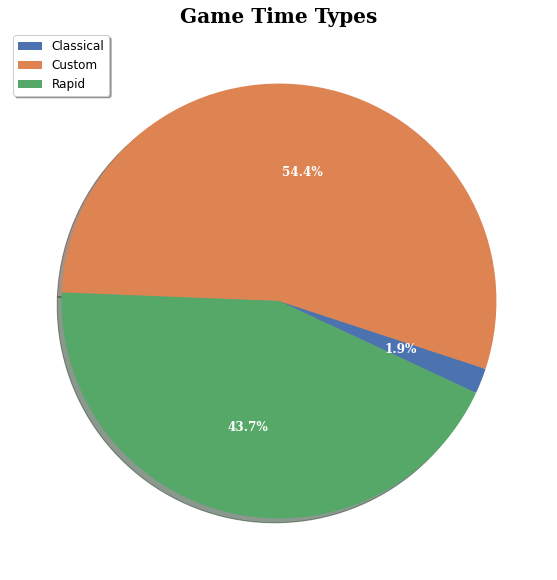

In [12]:
tc_comp = df.groupby(df.time_category).count()
data_tc = []
label = tc_comp.index

for x in tc_comp.rated:
    data_tc.append(x)
    
pieplot(data_tc, label, 'Game Time Types')

From 5 different categories that were already defined before, only three categories that are existed in the data set, **Classical (1.9%), Rapid (43.7%), and Custom (54.4%).** So, we need to find another way to categorize the time increment more specifically. 

So the categorization would be like this:
1. < 1 minute : super-bullet
2. 1 <= time <= 2 : bullet-like
3. 2 < time <= 5 : blitz-like
4. 5 < time <= 15 : rapid-like
5. 15 < time < 25 : rapid-classical
6. more than or equal to 25 minutes : classical-like

Before we apply these categories, we should modify the time_increment column. We will extract the minute value and separate it into a **new column named 'minutes'** which represent the minutes of the game.

In [13]:
import re

df[['minutes', 'increment']]= df['time_increment'].str.split('+', expand = True)
df

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,opening_code,opening_moves,opening_fullname,opening_shortname,time_category,minutes,increment
0,False,13,Out of Time,White,15+2,1500,1191,D10,5,Slav Defense: Exchange Variation,Slav Defense,Custom,15,2
1,True,16,Resign,Black,5+10,1322,1261,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,Custom,5,10
2,True,61,Mate,White,5+10,1496,1500,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,Custom,5,10
3,True,61,Mate,White,20+0,1439,1454,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,Custom,20,0
4,True,95,Mate,White,30+3,1523,1469,C41,5,Philidor Defense,Philidor Defense,Custom,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,24,Resign,White,10+10,1691,1220,A80,2,Dutch Defense,Dutch Defense,Custom,10,10
20054,True,82,Mate,Black,10+0,1233,1196,A41,2,Queen's Pawn,Queen's Pawn,Rapid,10,0
20055,True,35,Mate,White,10+0,1219,1286,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,Rapid,10,0
20056,True,109,Resign,White,10+0,1360,1227,B07,4,Pirc Defense,Pirc Defense,Rapid,10,0


The increment column is not needed because we will analyze the data based on **the minutes of the game** only. So, the increment and time increment column will be dropped. We will also change the data type of the minutes column to integer.

Because we are going to apply the new categorization, the time_category also will be dropped.

In [14]:
# Changing the minutes column data type to integer
df['minutes'] = df['minutes'].astype(int)

# Drop the increment and time_increment column
df = df.drop(['increment', 'time_increment', 'time_category'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   victory_status     20058 non-null  object
 3   winner             20058 non-null  object
 4   white_rating       20058 non-null  int64 
 5   black_rating       20058 non-null  int64 
 6   opening_code       20058 non-null  object
 7   opening_moves      20058 non-null  int64 
 8   opening_fullname   20058 non-null  object
 9   opening_shortname  20058 non-null  object
 10  minutes            20058 non-null  int32 
dtypes: bool(1), int32(1), int64(4), object(5)
memory usage: 1.5+ MB


In [15]:
# Apply the new categorization
category = []

for minute in df['minutes']:
    if minute < 1:
        category.append('Super_Bullet')
    elif 1 <= minute <= 2:
        category.append('Bullet_like')
    elif 2 < minute <= 5:
        category.append('Blitz_like')
    elif 5 < minute <= 15:
        category.append('Rapid_like')
    elif 15 < minute < 25:
        category.append('Rapid_Classical')
    else:
        category.append('Classical_like')
df['category'] = category

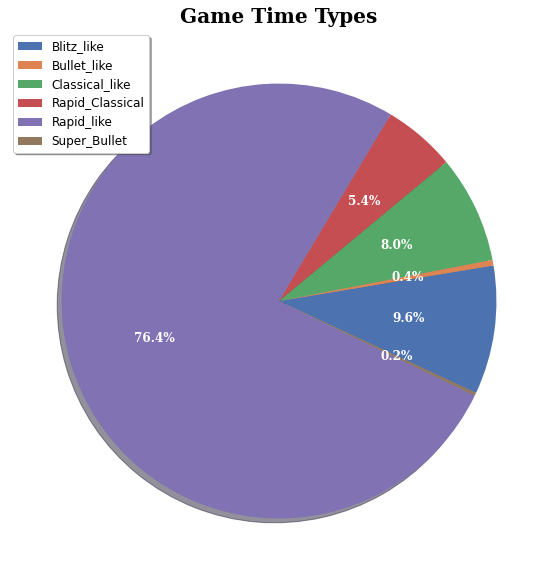

In [16]:
cat = df.groupby(df.category).count()
data_cat = []
label = cat.index

for x in cat.rated:
    data_cat.append(x)

pieplot(data_cat, label, 'Game Time Types')

So in our data, the most category is **rapid-like** which means most of the games-minutes are ranging from **5 to 15 minutes**.

## Player Rating Categorization

In [17]:
# Check the rating range
print('Minimum White Rating:', min(df['white_rating']))
print('Maximum White Rating:', max(df['white_rating']))
print('Maximum Black Rating:', max(df['black_rating']))
print('Minimum Black Rating:', min(df['black_rating']))

Minimum White Rating: 784
Maximum White Rating: 2700
Maximum Black Rating: 2723
Minimum Black Rating: 789


So, the minimum rating is 784 and the maximum rating is 2723. There is no significant difference between black and white rating. We will devide these rating based on USCF rating categories :
1. 600 - 799 : Class G
2. 800 - 999 : Class F
3. 1000 - 1199 : Class E
4. 1200 - 1399 : Class D
5. 1400 - 1599 : Class C
6. 1600 - 1799 : Class B
7. 1800 - 1999 : Class A
8. 2000 - 2199 : Expert
9. 2200 - 2399 : National Master
10. 2400 and up : Senior Master

In [18]:
# Apply the new categorization
rate = []

for x in df['white_rating']:
    if 600 <= x <= 799:
        rate.append('Class_G')
    elif 800 <= x <= 999:
        rate.append('Class_F')
    elif 1000 <= x <= 1199:
        rate.append('Class_E')
    elif 1200 <= x <= 1399:
        rate.append('Class_D')
    elif 1400 <= x <= 1599:
        rate.append('Class_C')
    elif 1600 <= x <= 1799:
        rate.append('Class_B')
    elif 1800 <= x <= 1999:
        rate.append('Class_A')
    elif 2000 <= x <= 2199:
        rate.append('Expert') 
    elif 2200 <= x <= 2399:
        rate.append('National_Master')
    else:
        rate.append('Senior_Master')

rateb = []
for x in df['black_rating']:
    if 600 <= x <= 799:
        rateb.append('Class_G')
    elif 800 <= x <= 999:
        rateb.append('Class_F')
    elif 1000 <= x <= 1199:
        rateb.append('Class_E')
    elif 1200 <= x <= 1399:
        rateb.append('Class_D')
    elif 1400 <= x <= 1599:
        rateb.append('Class_C')
    elif 1600 <= x <= 1799:
        rateb.append('Class_B')
    elif 1800 <= x <= 1999:
        rateb.append('Class_A')
    elif 2000 <= x <= 2199:
        rateb.append('Expert') 
    elif 2200 <= x <= 2399:
        rateb.append('National_Master')
    else:
        rateb.append('Senior_Master')
df['white_rating_class'] = rate
df['black_rating_class'] = rateb

In [19]:
# Calculate the rating difference between Black and White
df['rate_diff'] = df['black_rating'] - df['white_rating']
df

,rated,turns,victory_status,winner,white_rating,black_rating,opening_code,opening_moves,opening_fullname,opening_shortname,minutes,category,white_rating_class,black_rating_class,rate_diff
0,False,13,Out of Time,White,1500,1191,D10,5,Slav Defense: Exchange Variation,Slav Defense,15,Rapid_like,Class_C,Class_E,-309
1,True,16,Resign,Black,1322,1261,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,5,Blitz_like,Class_D,Class_D,-61
2,True,61,Mate,White,1496,1500,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,5,Blitz_like,Class_C,Class_C,4
3,True,61,Mate,White,1439,1454,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,20,Rapid_Classical,Class_C,Class_C,15
4,True,95,Mate,White,1523,1469,C41,5,Philidor Defense,Philidor Defense,30,Classical_like,Class_C,Class_C,-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,24,Resign,White,1691,1220,A80,2,Dutch Defense,Dutch Defense,10,Rapid_like,Class_B,Class_D,-471
20054,True,82,Mate,Black,1233,1196,A41,2,Queen's Pawn,Queen's Pawn,10,Rapid_like,Class_D,Class_E,-37
20055,True,35,Mate,White,1219,1286,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,10,Rapid_like,Class_D,Class_D,67
20056,True,109,Resign,White,1360,1227,B07,4,Pirc Defense,Pirc Defense,10,Rapid_like,Class_D,Class_D,-133


In [20]:
diff = []
for (x,y) in zip(df.white_rating_class, df.black_rating_class):
    if x ==  y:
        diff.append('Equal')
    else:
        diff.append('Different')
df['class_diff'] = diff

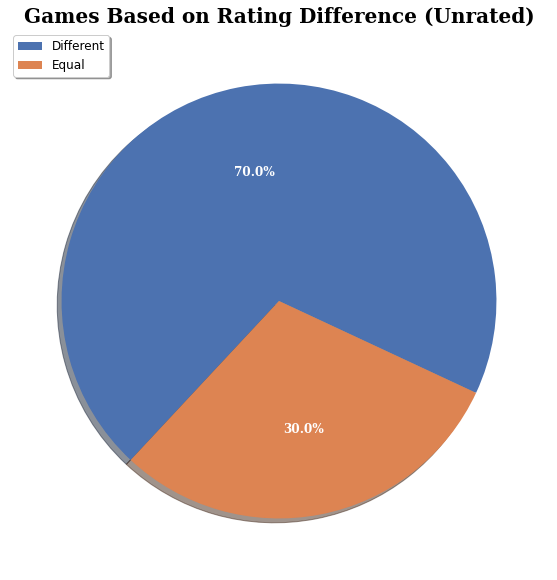

In [21]:
label = ['Different' , 'Equal']
df_ur = df.loc[df.rated == False]
df_r = df.loc[df.rated == True]

ur = df_ur.groupby(df_ur.class_diff).count()
ur_cd = []

for x in ur.rated:
    ur_cd.append(x)

pieplot(ur_cd, label, 'Games Based on Rating Difference (Unrated)')

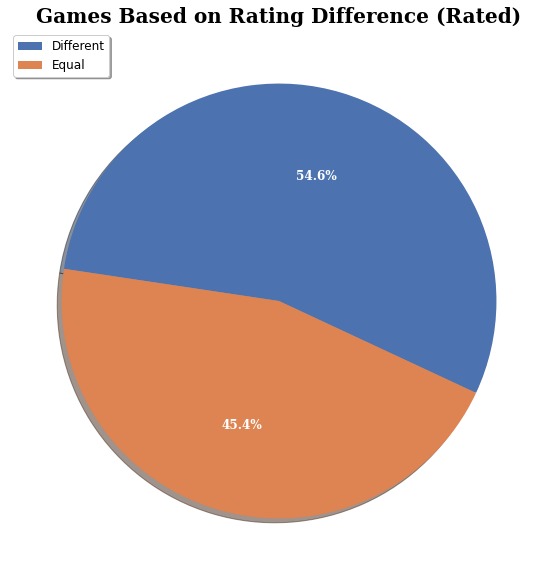

In [22]:
r = df_r.groupby(df_r.class_diff).count()
r_cd = []

for x in r.rated:
    r_cd.append(x)
pieplot(r_cd, label, 'Games Based on Rating Difference (Rated)')

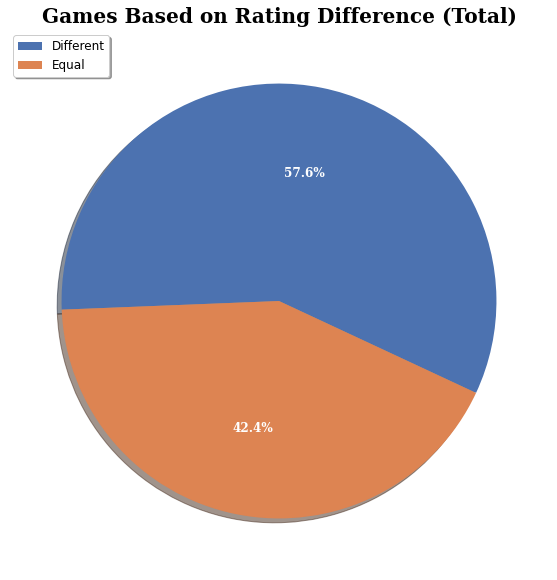

In [23]:
rate_diff = df.groupby(df.class_diff).count()
rate_data = []

for x in rate_diff.rated:
    rate_data.append(x)
pieplot(rate_data, label, 'Games Based on Rating Difference (Total)')
    

So, most of the game have different rating class between black and white side.

# Which side has bigger opportunity to win?

## Unrated Games

In [24]:
df_ur = df.loc[df.rated == False]
unrated = df_ur.groupby(df_ur.winner)[['winner','rated']].count()
unrated

,winner,rated
winner,,
Black,1723,1723
Draw,231,231
White,1949,1949


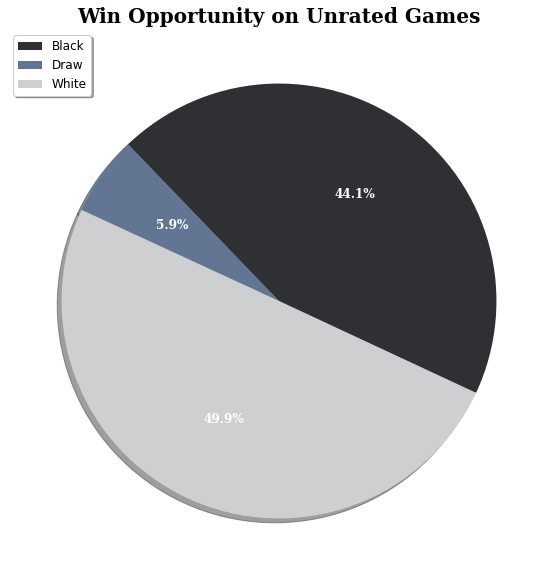

In [25]:
# Preparing the data, label, and colors
data_ur = []
label = ['Black', 'Draw', 'White']

for x in unrated.rated:
    data_ur.append(x)

pieplotbw(data_ur, label, 'Win Opportunity on Unrated Games')

## Rated Games

In [26]:
df_r = df.loc[df.rated == True]
rated = df_r.groupby(df_r.winner)[['winner','rated']].count()

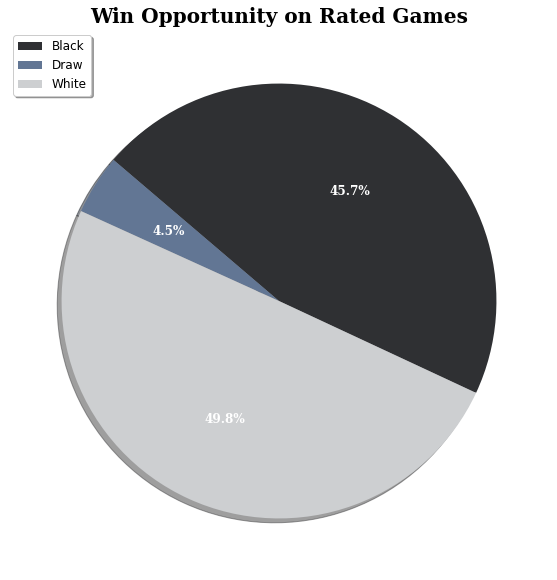

In [27]:
data_r = []

for x in rated.rated:
    data_r.append(x)

pieplotbw(data_r, label, 'Win Opportunity on Rated Games')

## All Games

In [28]:
allgames = df.groupby(df.winner)[['winner', 'rated']].count()

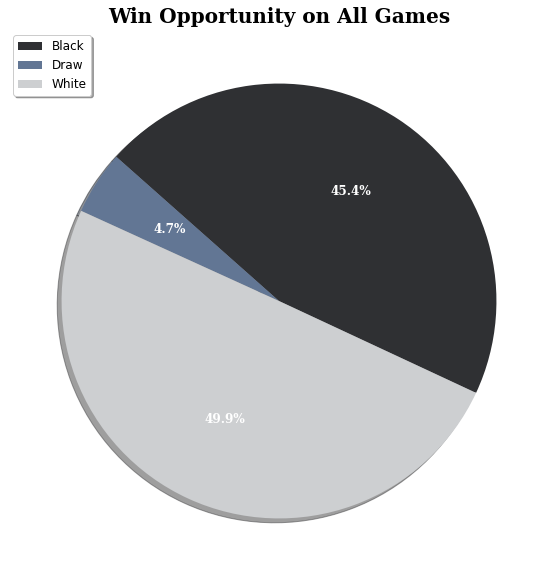

In [29]:
data_all = []

for x in allgames.rated:
    data_all.append(x)

pieplotbw(data_all, label, 'Win Opportunity on All Games')

## Based on Game Time

In [30]:
time_cat = df['category'].unique()
time_cat

array(['Rapid_like', 'Blitz_like', 'Rapid_Classical', 'Classical_like',
       'Bullet_like', 'Super_Bullet'], dtype=object)

In [31]:
dfs = []
for cat in time_cat:
    globals()[f"{cat}"] = df.loc[df.category == cat]
    globals()[f"{cat}"] = globals()[f"{cat}"].reset_index(drop = True)
    globals()[f"{cat}"] = globals()[f"{cat}"].groupby(globals()[f"{cat}"].winner).count()
    dfs.append(globals()[f"{cat}"])
    print (cat)


Rapid_like
Blitz_like
Rapid_Classical
Classical_like
Bullet_like
Super_Bullet


In [32]:
data_rl =[]
data_bl = []
data_rc = []
data_cl = []
data_bul = []
data_sb = []

for x in Rapid_like.rated:
    data_rl.append(x)
for x in Blitz_like.rated:
    data_bl.append(x)
for x in Rapid_Classical.rated:
    data_rc.append(x)
for x in Classical_like.rated:
    data_cl.append(x)
for x in Bullet_like.rated:
    data_bul.append(x)
for x in Super_Bullet.rated:
    data_sb.append(x)
all_data = [data_rl, data_bl, data_rc , data_cl , data_bul, data_sb ]

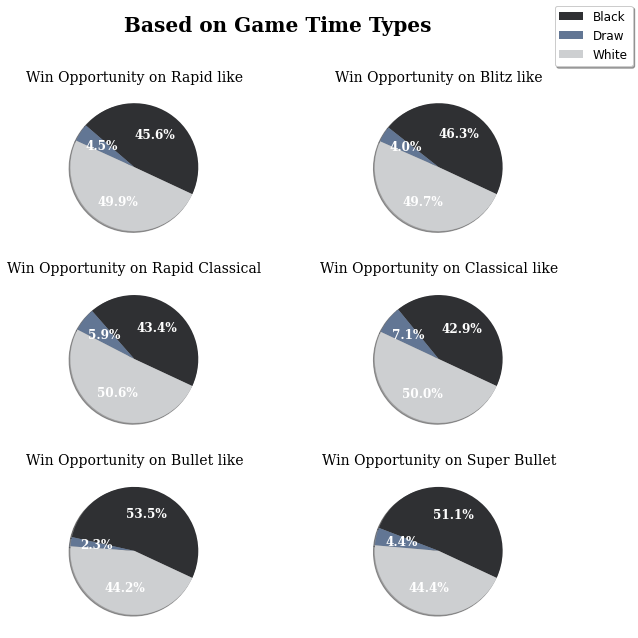

In [33]:
fig, ax = plt.subplots(3, 2, figsize= (10,10))

ax = ax.ravel()

title = ['Rapid like', 'Blitz like', 'Rapid Classical', 'Classical like',
       'Bullet like', 'Super Bullet']
x = np.arange(6)
colors = ['#2f3033','#627694', '#cdcfd1']

for (i, d, c) in zip(x, all_data, title):
        ax[i].pie(d, colors = colors, labels = label, autopct = '%1.1f%%', 
            textprops = {'color':'w','fontfamily' : 'serif', 'fontsize' : 12, 'weight' : 'bold'},
            shadow = True, startangle = -25)
        ax[i].set_title(f"Win Opportunity on {c}", fontsize = 14, fontfamily = 'Serif')

fig.legend(labels = label, loc = 1, fontsize = 'large', shadow = True)
fig.suptitle('Based on Game Time Types', fontsize = 20, fontfamily = 'Serif', fontweight = 'bold')
plt.show()

From all types of game time categories, **black only has bigger win opportunity on bullet-like and supper bullet game** (game time under 2 minutes) with notes these two-game time types are only **0.6% of the data**.

## Based on Rating Class Difference

### Different Rating Class

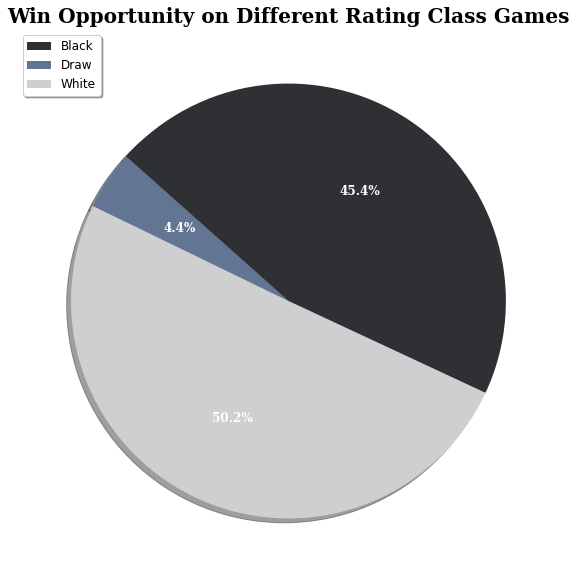

In [34]:
df_diff = df.loc[df.class_diff == 'Different']
df_eql = df.loc[df.class_diff == 'Equal']

dif = df_diff.groupby(df_diff.winner).count()
eql = df_eql.groupby(df_eql.winner).count()

data_dif = []
data_eql = []
label = ['Black', 'Draw', 'White']
for (x,y) in zip(dif.rated, eql.rated):
    data_dif.append(x)
    data_eql.append(y)

pieplotbw(data_dif, label, "Win Opportunity on Different Rating Class Games")


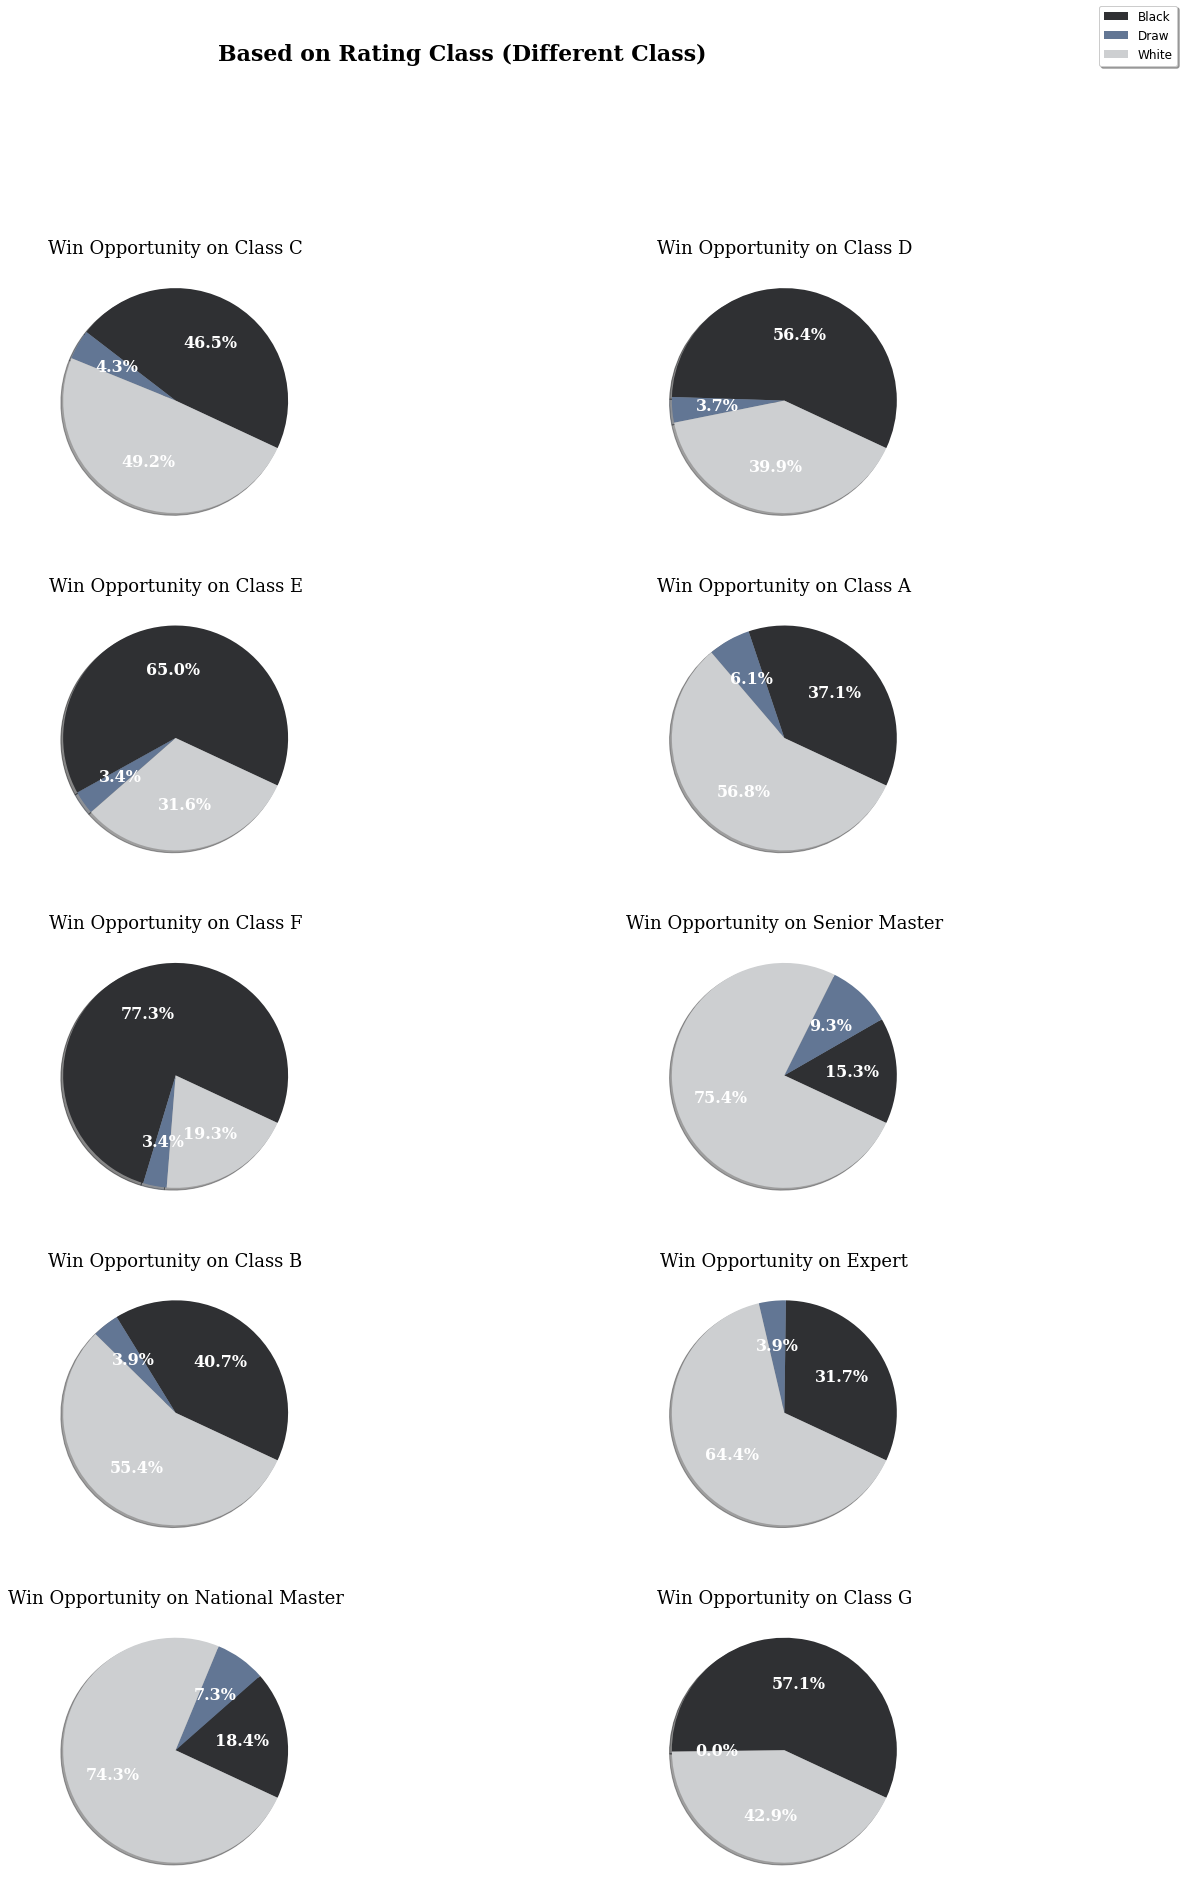

In [66]:
classes = df['white_rating_class'].unique()
classes

cl = []
for cls in classes:
    globals()[f"{cls}"] = df_diff.loc[df_diff.white_rating_class == cls]
    globals()[f"{cls}"] = globals()[f"{cls}"].reset_index(drop = True)
    globals()[f"{cls}"] = globals()[f"{cls}"].groupby(globals()[f"{cls}"].winner).count()
    cl.append(globals()[f"{cls}"])
#     print (cls)

class_name = ['C', 'D','E', 'A', 'F', 'SM', 'B', 'EX', 'NM', 'G']
all_class_data = []
for (x, y) in zip(cl, class_name):
    globals()[f"data_{y}"] =[]
    for a in x.rated:
        globals()[f"data_{y}"].append(a)
    all_class_data.append(globals()[f"data_{y}"])
all_class_data

#Because there is no draw in class G games, we will insert zero on it
all_class_data[-1].insert(1,0)
all_class_data

fig, ax = plt.subplots(5, 2, figsize= (20,30))

ax = ax.ravel()

title = ['Class C', 'Class D', 'Class E', 'Class A', 'Class F',
       'Senior Master', 'Class B', 'Expert', 'National Master', 'Class G']
x = np.arange(10)
colors = ['#2f3033','#627694', '#cdcfd1']

for (i, d, c) in zip(x, all_class_data, title):
        ax[i].pie(d, colors = colors, labels = label, autopct = '%1.1f%%', 
            textprops = {'color':'w','fontfamily' : 'serif', 'fontsize' : 16, 'weight' : 'bold'},
            shadow = True, startangle = -25)
        ax[i].set_title(f"Win Opportunity on {c}", fontsize = 18, fontfamily = 'Serif')

fig.legend(labels = label, loc = 1, fontsize = 'large', shadow = True)
fig.suptitle('Based on Rating Class (Different Class)', fontsize = 22, fontfamily = 'Serif', fontweight = 'bold')
plt.show()

### Based on Equeal Class

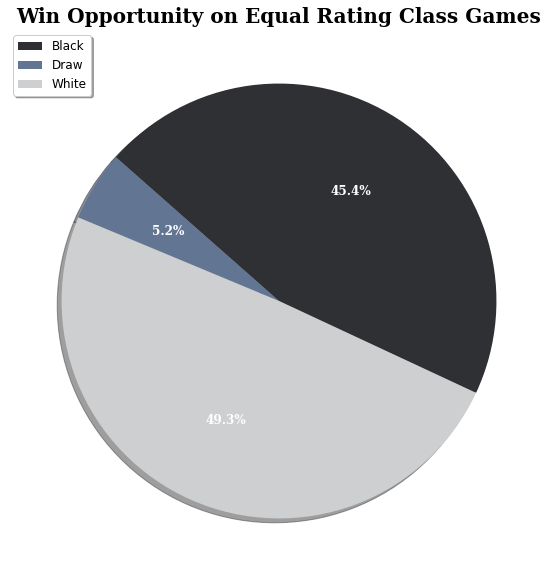

In [36]:
pieplotbw(data_eql, label, "Win Opportunity on Equal Rating Class Games")

In [37]:
classes = df['white_rating_class'].unique()
classes

cl = []
for cls in classes:
    globals()[f"{cls}"] = df_eql.loc[df_eql.white_rating_class == cls]
    globals()[f"{cls}"] = globals()[f"{cls}"].reset_index(drop = True)
    globals()[f"{cls}"] = globals()[f"{cls}"].groupby(globals()[f"{cls}"].winner).count()
    cl.append(globals()[f"{cls}"])
#     print (cls)

class_name = ['C', 'D','E', 'A', 'F', 'SM', 'B', 'EX', 'NM', 'G']
all_class_data = []
for (x, y) in zip(cl, class_name):
    globals()[f"data_{y}"] =[]
    for a in x.rated:
        globals()[f"data_{y}"].append(a)
    all_class_data.append(globals()[f"data_{y}"])
all_class_data

[[1325, 130, 1479],
 [669, 57, 737],
 [189, 26, 186],
 [602, 91, 625],
 [15, 18],
 [2, 1],
 [841, 90, 924],
 [182, 36, 178],
 [42, 13, 51],
 []]

In [38]:
# Because there is no draw on Class F and Class Senior Master Game, we will fill it with zero
all_class_data[4].insert(1, 0)
all_class_data[5].insert(1, 0)

# There is also no data on Class_G so we will delete it
del all_class_data[-1]

all_class_data

[[1325, 130, 1479],
 [669, 57, 737],
 [189, 26, 186],
 [602, 91, 625],
 [15, 0, 18],
 [2, 0, 1],
 [841, 90, 924],
 [182, 36, 178],
 [42, 13, 51]]

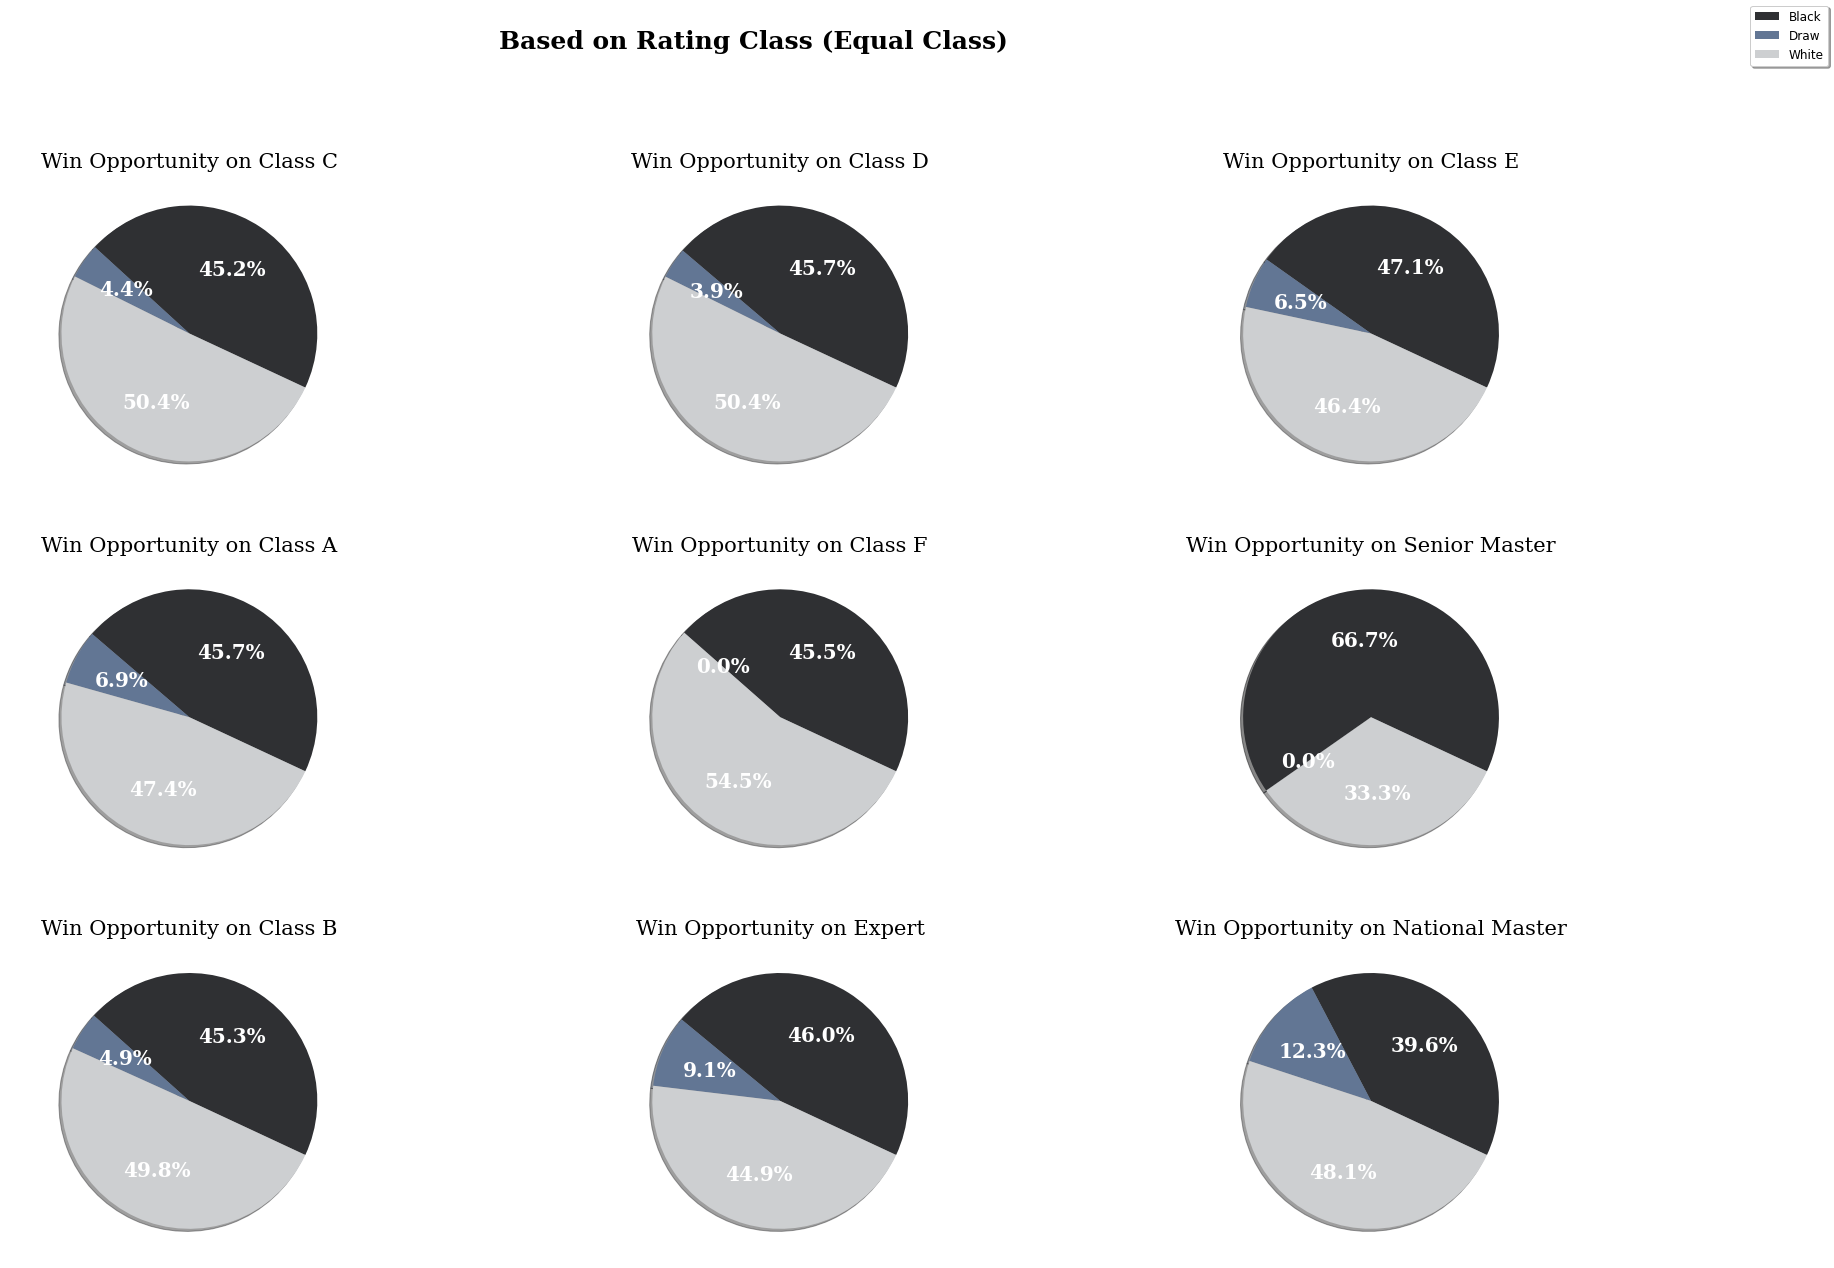

In [63]:
fig, ax = plt.subplots(3, 3, figsize= (30,20))

ax = ax.ravel()

title = ['Class C', 'Class D', 'Class E', 'Class A', 'Class F',
       'Senior Master', 'Class B', 'Expert', 'National Master']
x = np.arange(9)
colors = ['#2f3033','#627694', '#cdcfd1']
label = ['Black', 'Draw', 'White']
for (i, d, c) in zip(x, all_class_data, title):
        ax[i].pie(d, colors = colors, labels = label, autopct = '%1.1f%%', 
            textprops = {'color':'w','fontfamily' : 'serif', 'fontsize' : 20, 'weight' : 'bold'},
            shadow = True, startangle = -25)
        ax[i].set_title(f"Win Opportunity on {c}", fontsize = 21, fontfamily = 'Serif')

fig.legend(labels = label, loc = 1, fontsize = 'large', shadow = True)
fig.suptitle('Based on Rating Class (Equal Class)', fontsize = 25, fontfamily = 'Serif', fontweight = 'bold')
# plt.tight_layout()
plt.show()

Both on differnt rating class and equal rating class games, **white always has bigger opportunity to win the game** with opportunity different about 4% - 5%.

## Summerize Plot (Rating, Game Time, Winner)

In [81]:
df.loc[(df.white_rating_class == 'Class_D') & (df.category == 'Rapid_like') & (df.winner == 'White')]

,rated,turns,victory_status,winner,white_rating,black_rating,opening_code,opening_moves,opening_fullname,opening_shortname,minutes,category,white_rating_class,black_rating_class,rate_diff,class_diff
9,True,119,Mate,White,1381,1209,B01,4,Scandinavian Defense: Mieses-Kotroc Variation,Scandinavian Defense,10,Rapid_like,Class_D,Class_D,-172,Equal
23,True,36,Resign,White,1307,1106,A25,4,English Opening: King's English Variation | R...,English Opening,10,Rapid_like,Class_D,Class_E,-201,Different
32,True,54,Resign,White,1203,1019,B27,3,Sicilian Defense,Sicilian Defense,10,Rapid_like,Class_D,Class_E,-184,Different
47,False,7,Resign,White,1343,978,B20,3,Sicilian Defense: Bowdler Attack,Sicilian Defense,10,Rapid_like,Class_D,Class_F,-365,Different
123,True,23,Mate,White,1215,921,C50,5,Italian Game,Italian Game,15,Rapid_like,Class_D,Class_F,-294,Different
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20049,True,43,Mate,White,1328,1252,C00,5,French Defense: Two Knights Variation,French Defense,10,Rapid_like,Class_D,Class_D,-76,Equal
20050,True,9,Out of Time,White,1243,1142,A20,2,English Opening: King's English Variation,English Opening,10,Rapid_like,Class_D,Class_E,-101,Different
20052,True,37,Resign,White,1219,1250,A40,4,English Defense,English Defense,10,Rapid_like,Class_D,Class_D,31,Equal
20055,True,35,Mate,White,1219,1286,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,10,Rapid_like,Class_D,Class_D,67,Equal


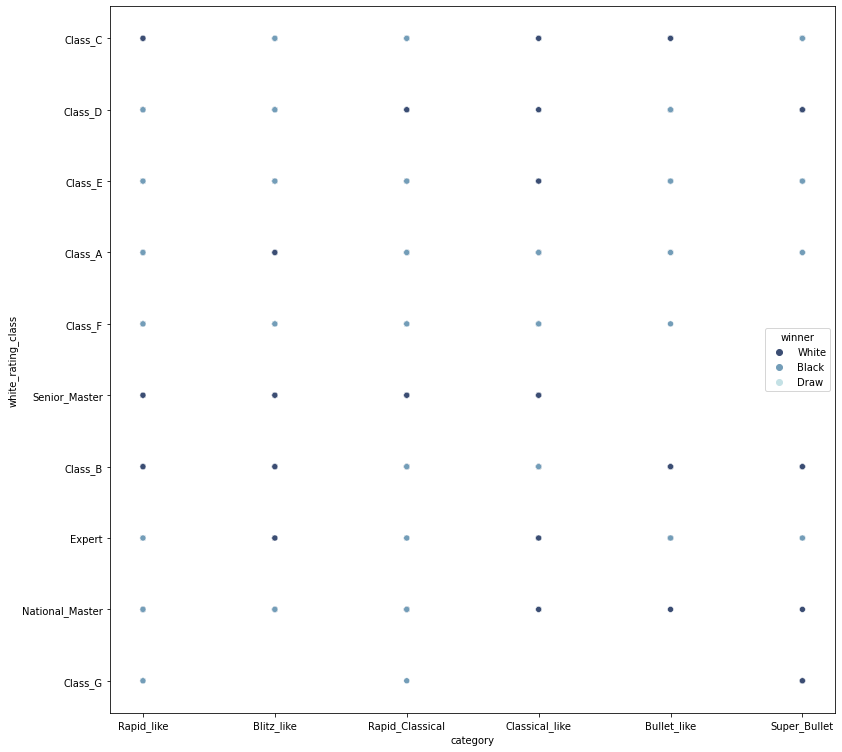

## Distribution on Rating Difference

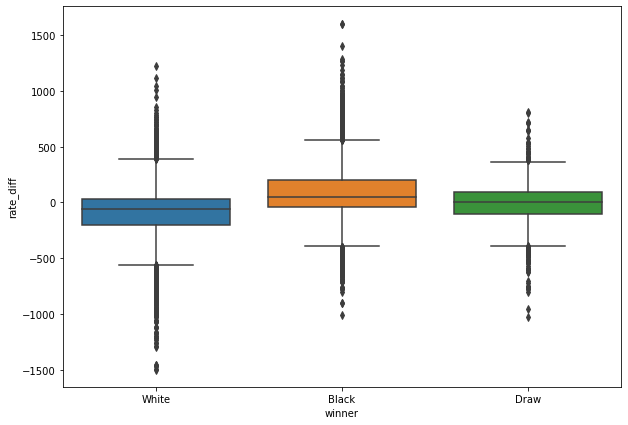

In [67]:
plt.figure(figsize = (10,7))

sns.boxplot(x = 'winner', y = 'rate_diff', data = df)
plt.show()

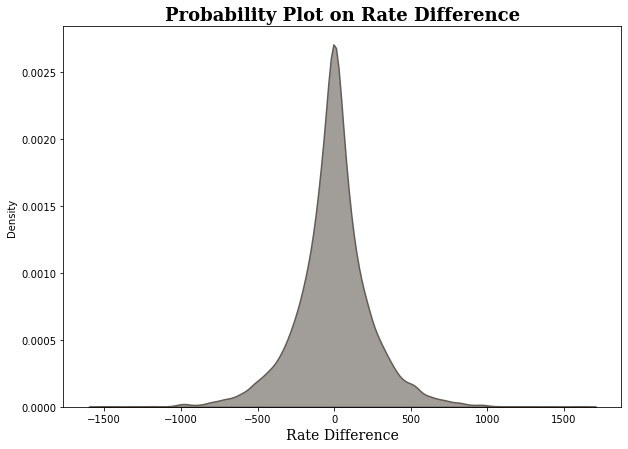

In [68]:
plt.figure(figsize = (10,7))

sns.kdeplot(x = 'rate_diff' , data = df, color = '#635c55', 
            fill = True, alpha = 0.6, linewidth = 1.5)
plt.xlabel('Rate Difference', fontsize = 14, fontfamily = 'serif')
plt.title('Probability Plot on Rate Difference', fontsize = 18, fontfamily = 'Serif', weight = 'bold')
plt.show()

The distribution of rate difference is a little bit skewed.

# What is the best opening for black?

# What is the best opening for white?